In [1]:
import numpy as np
from itertools import permutations
from tqdm.notebook import trange
from scipy.spatial.transform import Rotation as R

In [3]:
rots = []
for x in [0, 90, 180, 270]:
    for y in [0, 90, 180, 270]:
        for z in [0, 90, 180, 270]:
            r = R.from_euler('xyz', [x, y, z], degrees=True).as_matrix()
            r = r * (np.abs(r) > .01)
            if np.linalg.matrix_rank(r) == 3:
                rots.append(r + 0)

new = []
for m in rots:
    for n in new:
        if np.allclose(m, n):
            break
    else:
        new.append(m)
        
rots = new

In [47]:
scanners = []
# it = iter(open('./test.txt').readlines())
it = iter(open('../input/day19').readlines())
cur = None
for line in it:
    if not line.strip(): continue
    if 'scanner' in line:
        if cur is not None:
            scanners.append(np.array(cur))
        cur = []
    else:
        cur.append(list(map(int, line.split(','))))
scanners.append(np.array(cur))     

In [48]:
def np2set(a):
    return set(map(tuple, a))


def correspondance(s1, s2):
    s2set = np2set(s2)
    for r in rots:
        # p2 = r*p1 + b => b = p2 - r*p1
        for p1 in s1:
            for p2 in s2:
                b = p2 - r@p1
                tmp = np2set((r@s1.T).T + b)
                if len(s2set & tmp) >= 12:
                    return r, b

In [49]:
d = {}
for i in trange(len(scanners)):
    for j in trange(len(scanners)):
        if i == j: continue
        res = correspondance(scanners[i], scanners[j])
        if res is not None:
            d[i, j] = res

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

In [76]:
convs = {0: (np.eye(3), np.zeros(3))}
not_found = set(range(len(scanners))) - set(convs.keys())
while not_found:
    to_remove = set()
    to_add = {}
    for i in not_found:
        for j in convs:
            rj, bj = convs[j]
            if (i, j) in d:
                ri, bi = d[i, j]
                to_add[i] = (rj@ri, rj@bi + bj)
                to_remove.add(i)
            elif (j, i) in d:
                ri, bi = d[j, i]
                ri_inv = np.linalg.inv(ri)
                to_add[i] = (ri_inv, ri_inv@bi)
                to_remove.add(i)
    print(to_remove)
    not_found = not_found - to_remove
    convs.update(to_add)
    print(len(not_found))

{17, 12, 20}
28
{0, 27}
26
{8, 9, 21}
23
{1, 6, 11, 28, 31}
18
{3, 4, 7, 10, 16, 29}
12
{5, 13, 23, 24, 30}
7
{14, 15, 18, 19, 22, 25, 26}
0


In [77]:
points = set()
for i, s in enumerate(scanners):
    r, b = convs[i]
    points.update(np2set((r@s.T).T + b))

In [78]:
len(points)

467

In [59]:
import networkx as nx

In [60]:
g = nx.Graph()

In [61]:
for i, j in d:
    g.add_edge(i, j)

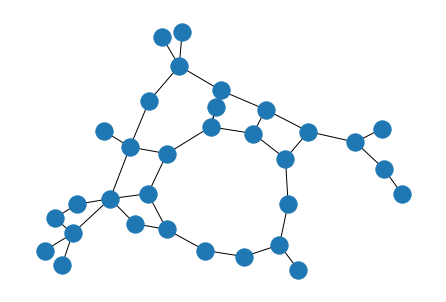

In [63]:
nx.draw(g)

In [67]:
points = set(map(lambda x: tuple(map(int, x)), points))

In [69]:
points

{(-4273, -575, -811),
 (-4232, -822, -1774),
 (-4228, -497, -883),
 (-4202, -590, -720),
 (-4168, 637, -683),
 (-4160, 510, -747),
 (-4148, 645, -690),
 (-4123, -671, -1807),
 (-4074, 826, -2029),
 (-4051, -787, -1703),
 (-4035, 835, -1984),
 (-4004, 801, -1857),
 (-3615, 103, -1303),
 (-3587, -44, -1171),
 (-3026, 776, -1769),
 (-2931, -513, -1914),
 (-2912, 835, -1807),
 (-2906, -346, -1875),
 (-2899, 701, -1770),
 (-2880, -380, -390),
 (-2872, -505, -1904),
 (-2860, -522, -443),
 (-2847, -306, -458),
 (-2774, 706, -557),
 (-2674, 607, -605),
 (-2667, 868, -577),
 (-2401, 40, -1315),
 (-2304, 121, -1133),
 (-2129, -542, -289),
 (-2114, -1571, -732),
 (-2083, -608, 638),
 (-2066, -1570, -736),
 (-2063, -625, 610),
 (-2051, -1568, -684),
 (-2013, -552, -229),
 (-2003, -1687, -551),
 (-1997, -458, -397),
 (-1966, 870, -1758),
 (-1963, -452, -320),
 (-1945, -501, 648),
 (-1944, -467, -535),
 (-1942, 2049, -1791),
 (-1939, -499, -325),
 (-1936, 1936, -1674),
 (-1936, 2016, -783),
 (-1922,